In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

# ML Libraries :
from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, Normalizer, RobustScaler, MaxAbsScaler
from sklearn.model_selection          import KFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.linear_model             import LogisticRegression
from sklearn                          import tree
from sklearn.ensemble                 import RandomForestClassifier
from sklearn.metrics                  import accuracy_score
from sklearn.metrics                  import f1_score,precision_score
from sklearn.tree import               DecisionTreeClassifier 

# Boosting Algorithms just in case:
from xgboost                          import XGBClassifier
from lightgbm                         import LGBMClassifier

In [38]:
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score

In [2]:
df = pd.read_csv("US_Accidents_Dec20_updated.csv")

In [3]:
df.head(6)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08  40.108910   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20  39.865420   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.102660   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39  39.101480   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45  41.062130   
5  A-2716605         3  2016-02-08 07:53:43  2016-02-08 13:53:43  39.172393   

   Start_Lng    End_Lat    End_Lng  Distance(mi)  \
0 -83.092860  40.112060 -83.031870         3.230   
1 -84.062800  39.865010 -84.048730         0.747   
2 -84.524680  39.102090 -84.523960         0.055   
3 -84.523410  39.098410 -84.522410         0.219   
4 -81.537840  41.062170 -81.535470         0.123   
5 -84.492792  39.170476 -84.501798         0.500   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   
5                 At Mitchell Ave/Exit 6 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   
5  False           False          False        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  
5            Day               Day                   Day  

[6 rows x 47 columns]

Data exploration

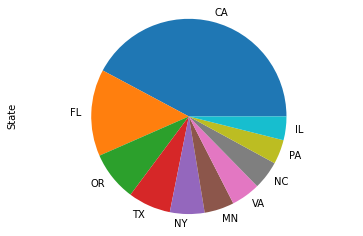

Total number of States in the dataset = 49
From the above plotting it is clear that California(CA) has most number of accidents.


In [11]:
df.State.value_counts()[:10].plot(kind='pie')
plt.axis('equal')
plt.show()
print("Total number of States in the dataset = "+str(len(df.State.unique())))

For a state like New york, there will be fewer number of accidents compared to the rest because most people use the transportation and is smaller in terms of land size. 
With a state with so many areas for luxury cars, speeding a main contributors to their car accidents. 

In [5]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

C:\Users\capob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

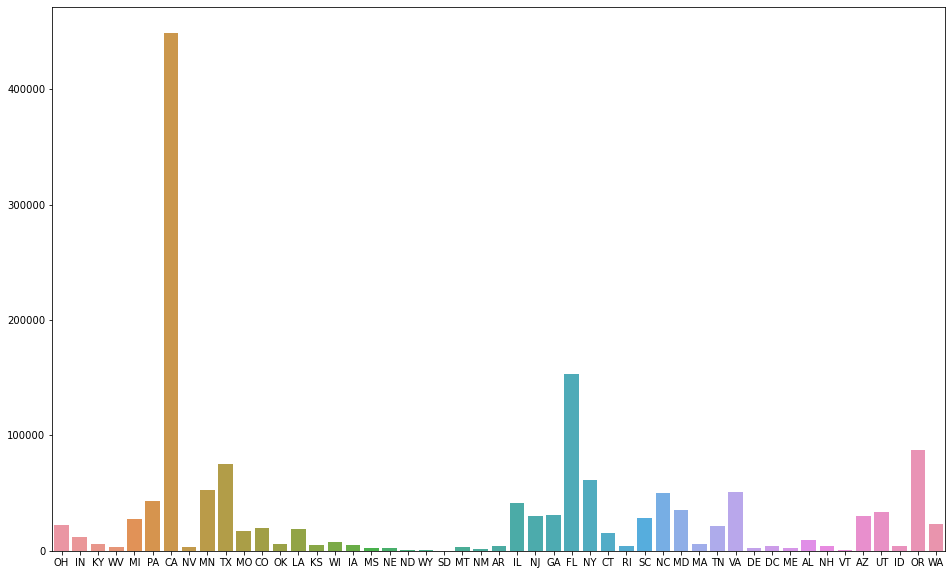

In [4]:
total_number_of_accidents=[]
for i in df.State.unique():
    total_number_of_accidents.append(df[df['State']==i].count()['ID'])

fig,ax = plt.subplots(figsize=(16,10))
sns.barplot(df.State.unique(),total_number_of_accidents)

In [16]:
df.describe().T

count         mean           std         min  \
Severity           1516064.0     2.238630      0.608148    1.000000   
Start_Lat          1516064.0    36.900558      5.165653   24.570222   
Start_Lng          1516064.0   -98.599194     18.496022 -124.497567   
End_Lat            1516064.0    36.900606      5.165629   24.570110   
End_Lng            1516064.0   -98.599010     18.495903 -124.497829   
Distance(mi)       1516064.0     0.587262      1.632659    0.000000   
Number              469969.0  8907.533114  22421.896710    0.000000   
Temperature(F)     1473031.0    59.584597     18.273164  -89.000000   
Wind_Chill(F)      1066748.0    55.109760     21.127345  -89.000000   
Humidity(%)        1470555.0    64.659601     23.259865    1.000000   
Pressure(in)       1479790.0    29.554954      1.016756    0.000000   
Visibility(mi)     1471853.0     9.131755      2.889112    0.000000   
Wind_Speed(mph)    1387202.0     7.630812      5.637364    0.000000   
Precipitation(in)  1005515.0     0.008478      0.129317    0.000000   

                           25%          50%           75%           max  
Severity              2.000000     2.000000      2.000000  4.000000e+00  
Start_Lat            33.854225    37.351130     40.725927  4.900058e+01  
Start_Lng          -118.207575   -94.381003    -80.874690 -6.711317e+01  
End_Lat              33.854204    37.351342     40.725930  4.907500e+01  
End_Lng            -118.207746   -94.379875    -80.874490 -6.710924e+01  
Distance(mi)          0.000000     0.178000      0.594000  1.551860e+02  
Number             1212.000000  4000.000000  10100.000000  9.999997e+06  
Temperature(F)       47.000000    61.000000     73.000000  1.706000e+02  
Wind_Chill(F)        40.800000    57.000000     71.000000  1.130000e+02  
Humidity(%)          48.000000    68.000000     84.000000  1.000000e+02  
Pressure(in)         29.440000    29.880000     30.040000  5.804000e+01  
Visibility(mi)       10.000000    10.000000     10.000000  1.400000e+02  
Wind_Speed(mph)       4.600000     7.000000     10.400000  9.840000e+02  
Precipitation(in)     0.000000     0.000000      0.000000  2.400000e+01

In [5]:
keep_time = df['Start_Time'].str.split(" ",expand=True)
df['date'] = keep_time[0]
df['Time'] = keep_time[1]

In [20]:
df.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   

                                         Description  ...   Stop  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...  False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...  False   
2                   At I-71/US-50/Exit 1 - Accident.  ...  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   
1           False          False        False          Night          Night   
2           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight        date      Time  
0             Night                 Night  2016-02-08  00:37:08  
1             Night                 Night  2016-02-08  05:56:20  
2             Night                   Day  2016-02-08  06:15:39  

[3 rows x 49 columns]

Format time

In [7]:
from tqdm import tqdm
new_time = []
for i in range(0,24):
    new_time.append(i)
i=0
n=1
count = []

for i in tqdm(range(len(new_time)-1)):
    if i < 9:
        hour_start = '0'+str(i)+":"+'00'+':'+"00"
        
        hour_end = '0'+str(n)+":"+'00'+':'+"00"
        count.append(len(df[(df['Time']>=hour_start)&(df['Time']<=hour_end)]))
    
    elif i==9:
        hour_start = '0'+str(i)+":"+'00'+':'+"00"
        hour_end = str(n)+":"+'00'+':'+"00"
        count.append(len(df[(df['Time']>=hour_start)&(df['Time']<=hour_end)]))
            
            
    else:
        hour_start = str(i)+":"+'00'+':'+"00"

        hour_end = str(n)+":"+'00'+':'+"00"
        count.append(len(df[(df['Time']>=hour_start)&(df['Time']<=hour_end)]))
        
    i = n
    n = i+1


100%|██████████| 23/23 [00:05<00:00,  3.84it/s]


Using formatted time, create a hour count for data visulaization

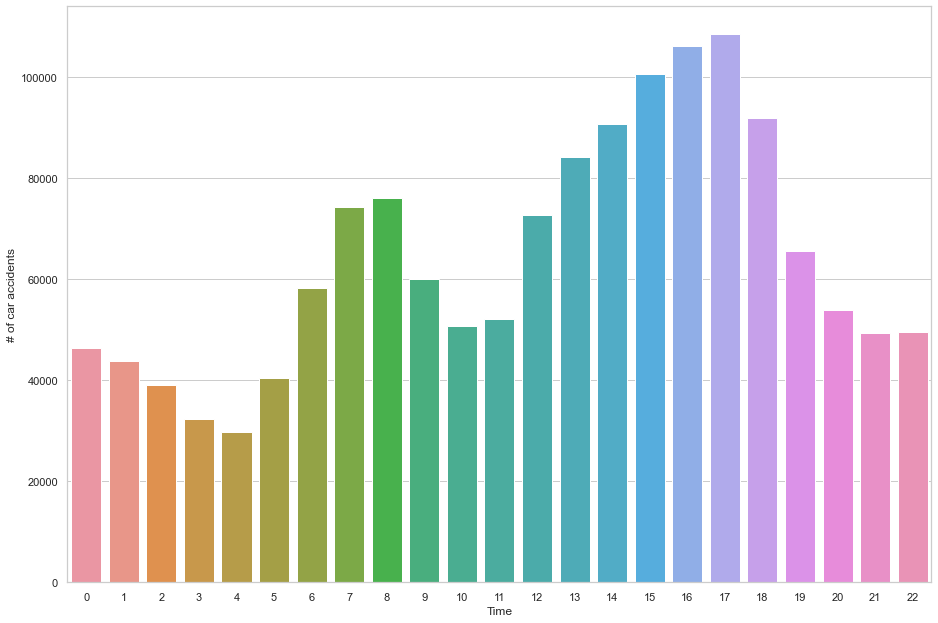

In [8]:
hour = []
for i in range(len(count)):
    hour.append(i)
X = hour
y = count

sns.set(style="whitegrid")
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax = sns.barplot(x=X, y=count)
ax.set(xlabel='Time', ylabel='# of car accidents')
plt.show()


Text(0.5, 1.0, 'Severity Percentage')

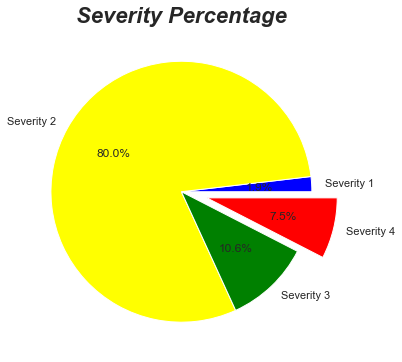

In [11]:
seve_df = df.groupby('Severity').size()
seve_df = df_sev[[1,2,3,4]]
cols = ['blue','yellow', 'green', 'red']
cases = ['Severity 1','Severity 2','Severity 3','Severity 4']
plt.figure(figsize=(10,6))
plt.pie(seve_df,
        colors = cols,
        labels= cases,
        explode = (0,0,0,0.2), #moving slices apart
        autopct = ('%1.1f%%')) #display the percentages of severity
plt.title('Severity Percentage', weight='heavy', fontsize=22, style='italic')

Pearson Correlation for feature selection

<AxesSubplot:>

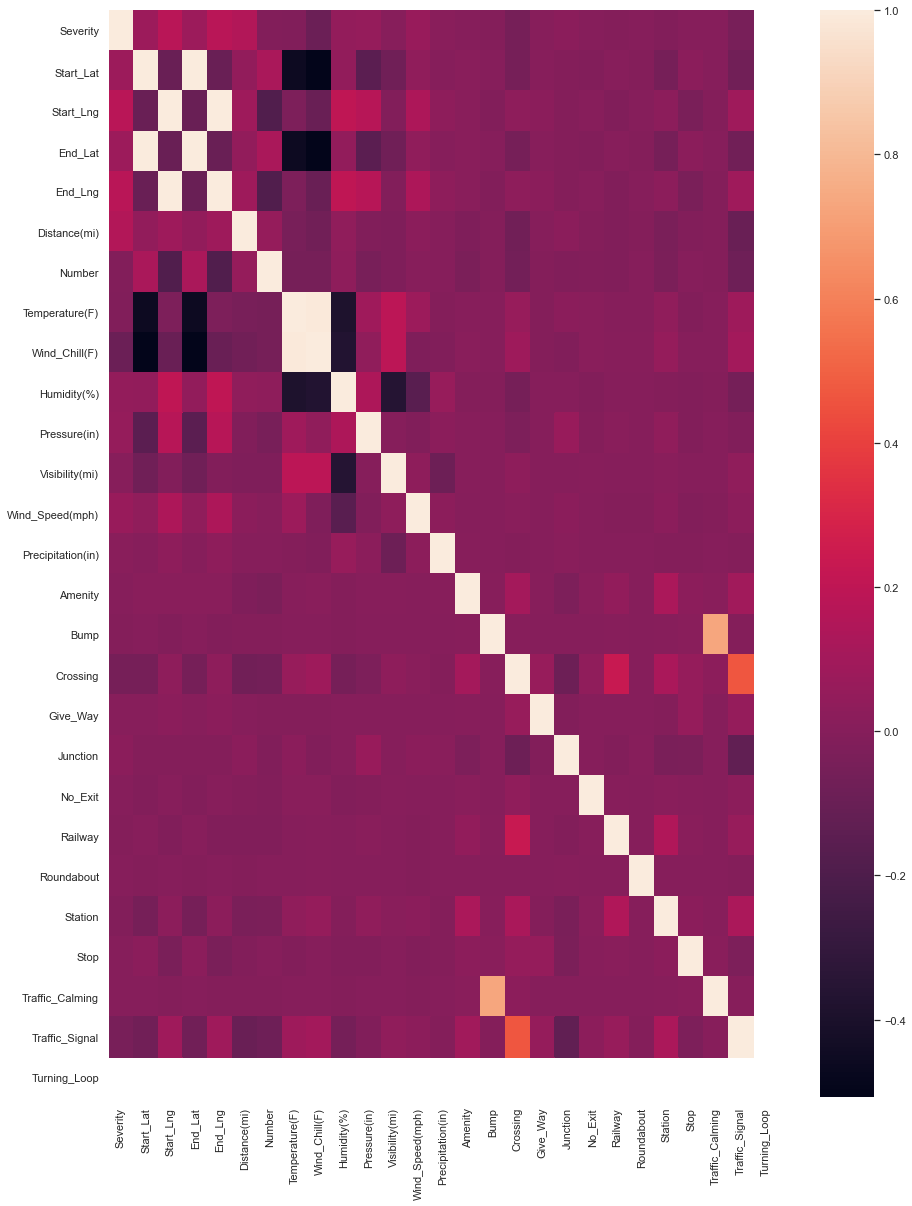

In [26]:
dims =(15,20)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(ax=ax, data=df.corr())

Observe correlation values 

In [28]:
corr_val = df.corr()

corr_new = corr_val.unstack()
corr_new = corr_new.sort_values()

pd.set_option('display.max_rows', None)
print(corr_new[corr_new > 0])
#print(corr_new[corr_new < 0])

Station            Roundabout           0.000045
Roundabout         Station              0.000045
                   Crossing             0.000046
Crossing           Roundabout           0.000046
Visibility(mi)     Roundabout           0.000171
Roundabout         Visibility(mi)       0.000171
Railway            Precipitation(in)    0.000233
Precipitation(in)  Railway              0.000233
Stop               Roundabout           0.000429
Roundabout         Stop                 0.000429
Wind_Chill(F)      Stop                 0.000539
Stop               Wind_Chill(F)        0.000539
Traffic_Calming    End_Lat              0.000594
End_Lat            Traffic_Calming      0.000594
Start_Lat          Traffic_Calming      0.000597
Traffic_Calming    Start_Lat            0.000597
Amenity            Roundabout           0.000736
Roundabout         Amenity              0.000736
Traffic_Calming    Give_Way             0.000754
Give_Way           Traffic_Calming      0.000754
Pressure(in)       V

Spearman Correlation for final feature selection

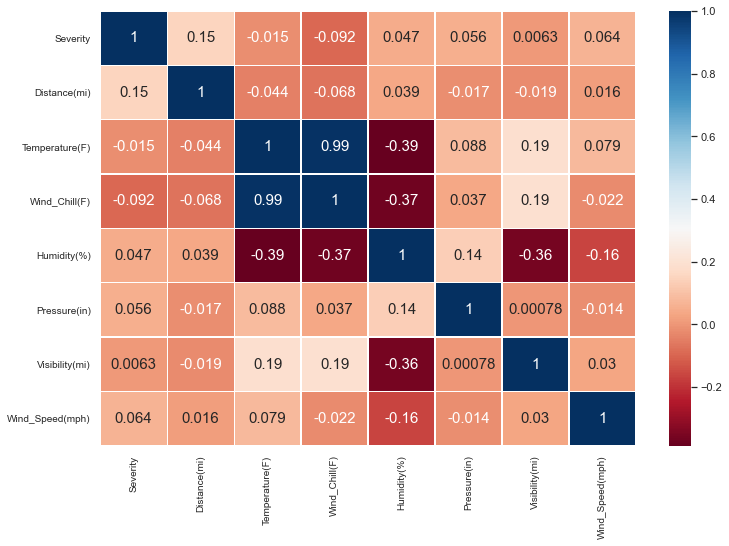

In [32]:
fig=sns.heatmap(df[['Severity','Distance(mi)',
                    'Temperature(F)','Wind_Chill(F)','Humidity(%)',
                    'Pressure(in)','Visibility(mi)','Wind_Speed(mph)']].corr(),
                annot=True,cmap='RdBu',linewidths=0.2,annot_kws={'size':15})
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<AxesSubplot:ylabel='Severity'>

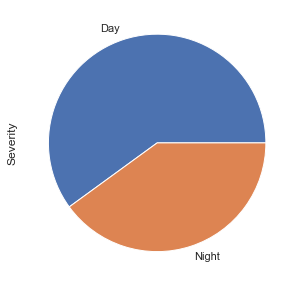

In [33]:
plt.figure(figsize =(10,5))
df.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

Preprocessing 

In [31]:
df.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  

[3 rows x 47 columns]

In [9]:
use_cols = ["Pressure(in)", "Wind_Speed(mph)", "Visibility(mi)", ""]

In [10]:
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

117
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Light Rain / Windy' 'Widespread Dust'
 'Mostly Cloudy / Windy' 'Blowing Dust / Windy' 'Blowing Dust'
 'Volcanic Ash' 'Freezing Rain / Windy' 'Small Hail

In [11]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan


In [12]:
print(df["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [13]:
df["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [14]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")



In [15]:
df["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

In [42]:
#display(df.isnull().sum())

In [16]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'date', 'Time'],
      dtype='object')

In [17]:
df = df.drop(columns=['Description', 'Number', 'Street', 'City', 'State', 'Zipcode', 'Weather_Timestamp', 'Airport_Code', 
                      'Weather_Timestamp', 'Give_Way', 'Bump', 'Traffic_Calming', 'Roundabout', 'No_Exit',
                      'Astronomical_Twilight', 'Nautical_Twilight', 'Sunrise_Sunset', 'Turning_Loop'
                     ], axis=1)

In [18]:
df = df.drop(columns=['Civil_Twilight'], axis=1)


In [19]:
df.head(3)

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   

   Start_Lng   End_Lat   End_Lng  Distance(mi) Side  ... Weather_Condition  \
0  -83.09286  40.11206 -83.03187         3.230    R  ...              Rain   
1  -84.06280  39.86501 -84.04873         0.747    R  ...              Rain   
2  -84.52468  39.10209 -84.52396         0.055    R  ...            Cloudy   

  Amenity Crossing  Junction  Railway  Station   Stop  Traffic_Signal  \
0   False    False     False    False    False  False           False   
1   False    False     False    False    False  False           False   
2   False    False      True    False    False  False           False   

         date      Time  
0  2016-02-08  00:37:08  
1  2016-02-08  05:56:20  
2  2016-02-08  06:15:39  

[3 rows x 31 columns]

In [46]:
display(df.isnull().sum())

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Side                      0
County                    0
Country                   0
Timezone               2302
Temperature(F)        43033
Wind_Chill(F)        449316
Humidity(%)           45509
Pressure(in)          36274
Visibility(mi)        44211
Wind_Direction        41858
Wind_Speed(mph)      128862
Precipitation(in)    510549
Weather_Condition     44410
Amenity                   0
Crossing                  0
Junction                  0
Railway                   0
Station                   0
Stop                      0
Traffic_Signal            0
dtype: int64

In [20]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

Extract year, month, weekday and day

In [21]:
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day


Extract hour and minute

In [22]:
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

In [23]:
df.head(1)

ID  Severity          Start_Time             End_Time  Start_Lat  \
0  A-2716600         3 2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   

   Start_Lng   End_Lat   End_Lng  Distance(mi) Side  ...   Stop  \
0  -83.09286  40.11206 -83.03187          3.23    R  ...  False   

  Traffic_Signal        date      Time  Year  Month  Weekday  Day Hour  Minute  
0          False  2016-02-08  00:37:08  2016      2        0    8    0      37  

[1 rows x 37 columns]

In [24]:
display(df.isnull().sum())

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Side                      0
County                    0
Country                   0
Timezone               2302
Temperature(F)        43033
Wind_Chill(F)        449316
Humidity(%)           45509
Pressure(in)          36274
Visibility(mi)        44211
Wind_Direction        41858
Wind_Speed(mph)      128862
Precipitation(in)    510549
Weather_Condition     44410
Amenity                   0
Crossing                  0
Junction                  0
Railway                   0
Station                   0
Stop                      0
Traffic_Signal            0
date                      0
Time                      0
Year                      0
Month                     0
Weekday                   0
Day                       0
Hour                

In [25]:
import math 
data = df[['Side','Wind_Direction','Day','Month','Year','Hour']]
target = df['Severity']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=4)

In [27]:
def data_encoding( encoding_strat , encoding_data , encoding_features ):
    
    if encoding_strat == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for feature in encoding_features :
            print("column",feature )
            encoding_data[ feature ] = Encoder.fit_transform(tuple(encoding_data[ feature ]))
        
    elif encoding_strat == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
        
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    
    return encoding_data

In [28]:
encoding_features  = [ 'Side','Day', 'Week', 'Month', 'Hour' ]
encoding_strat = [ "LabelEncoding", "OneHotEncoding"]

In [29]:
X_train_encode = data_encoding( encoding_strat[1] , X_train , encoding_features )
X_test_encode =  data_encoding( encoding_strat[1] , X_test  , encoding_features )

ELIF OneHotEncoding
ELIF OneHotEncoding


In [30]:
display(X_train_encode.head())
display(X_test_encode.head())

Day  Month  Year  Hour  Side_L  Side_R  Wind_Direction_Calm  \
1373638   18      1  2018     9       0       1                    0   
21027     23     11  2016    12       0       1                    0   
1154581   11      9  2019     8       0       1                    0   
353199    10     11  2020    12       0       1                    1   
746541     1      5  2020    16       1       0                    0   

         Wind_Direction_E  Wind_Direction_N  Wind_Direction_NE  \
1373638                 0                 1                  0   
21027                   0                 0                  0   
1154581                 0                 0                  1   
353199                  0                 0                  0   
746541                  0                 0                  1   

         Wind_Direction_NW  Wind_Direction_S  Wind_Direction_SE  \
1373638                  0                 0                  0   
21027                    1                 0                  0   
1154581                  0                 0                  0   
353199                   0                 0                  0   
746541                   0                 0                  0   

         Wind_Direction_SW  Wind_Direction_Variable  Wind_Direction_W  
1373638                  0                        0                 0  
21027                    0                        0                 0  
1154581                  0                        0                 0  
353199                   0                        0                 0  
746541                   0                        0                 0

Day  Month  Year  Hour  Side_L  Side_R  Wind_Direction_Calm  \
434808    19     10  2020     2       0       1                    1   
828684    15      6  2020     6       0       1                    0   
1061789   19     12  2019    12       0       1                    0   
682515    11     12  2020    13       0       1                    0   
634053    15     11  2020     4       0       1                    1   

         Wind_Direction_E  Wind_Direction_N  Wind_Direction_NE  \
434808                  0                 0                  0   
828684                  0                 0                  1   
1061789                 0                 0                  0   
682515                  0                 0                  0   
634053                  0                 0                  0   

         Wind_Direction_NW  Wind_Direction_S  Wind_Direction_SE  \
434808                   0                 0                  0   
828684                   0                 0                  0   
1061789                  1                 0                  0   
682515                   0                 0                  0   
634053                   0                 0                  0   

         Wind_Direction_SW  Wind_Direction_Variable  Wind_Direction_W  
434808                   0                        0                 0  
828684                   0                        0                 0  
1061789                  0                        0                 0  
682515                   0                        1                 0  
634053                   0                        0                 0

In [31]:
def data_scaling( scaling_strat , scaling_data , scaling_feature ):
    
    if    scaling_strat =="RobustScaler" :
        scaling_data[scaling_feature] = RobustScaler().fit_transform(scaling_data[scaling_feature])
        
    elif  scaling_strat =="StandardScaler" :
        scaling_data[scaling_feature] = StandardScaler().fit_transform(scaling_data[scaling_feature])
        
    elif  scaling_strat =="MinMaxScaler" :
        scaling_data[scaling_feature] = MinMaxScaler().fit_transform(scaling_data[scaling_feature])
        
    elif  scaling_strat =="MaxAbsScaler" :
        scaling_data[scaling_feature] = MaxAbsScaler().fit_transform(scaling_data[scaling_feature])
        
    else :  # Robust Scalar is still performed If any other scaling send by mistake 
        scaling_data[scaling_feature] = RobustScaler().fit_transform(scaling_data[scaling_feature])
    
    return scaling_data

In [32]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train = data_scaling( scaling_strategy[0] , X_train_encode , X_train_encode.columns )
X_test  = data_scaling( scaling_strategy [0] , X_test_encode  , X_test_encode.columns )


Display Scaled Train and Test Features 

In [33]:
display(X_train.head())
display(X_test.head())

Day     Month  Year      Hour  Side_L  Side_R  \
1373638  0.066667 -1.333333  -1.0 -0.555556     0.0     0.0   
21027    0.400000  0.333333  -2.0 -0.222222     0.0     0.0   
1154581 -0.400000  0.000000  -0.5 -0.666667     0.0     0.0   
353199  -0.466667  0.333333   0.0 -0.222222     0.0     0.0   
746541  -1.066667 -0.666667   0.0  0.222222     1.0    -1.0   

         Wind_Direction_Calm  Wind_Direction_E  Wind_Direction_N  \
1373638                  0.0               0.0               1.0   
21027                    0.0               0.0               0.0   
1154581                  0.0               0.0               0.0   
353199                   1.0               0.0               0.0   
746541                   0.0               0.0               0.0   

         Wind_Direction_NE  Wind_Direction_NW  Wind_Direction_S  \
1373638                0.0                0.0               0.0   
21027                  0.0                1.0               0.0   
1154581                1.0                0.0               0.0   
353199                 0.0                0.0               0.0   
746541                 1.0                0.0               0.0   

         Wind_Direction_SE  Wind_Direction_SW  Wind_Direction_Variable  \
1373638                0.0                0.0                      0.0   
21027                  0.0                0.0                      0.0   
1154581                0.0                0.0                      0.0   
353199                 0.0                0.0                      0.0   
746541                 0.0                0.0                      0.0   

         Wind_Direction_W  
1373638               0.0  
21027                 0.0  
1154581               0.0  
353199                0.0  
746541                0.0

Day     Month  Year      Hour  Side_L  Side_R  \
434808   0.200000  0.166667   0.0 -1.333333     0.0     0.0   
828684  -0.066667 -0.500000   0.0 -0.888889     0.0     0.0   
1061789  0.200000  0.500000  -0.5 -0.222222     0.0     0.0   
682515  -0.333333  0.500000   0.0 -0.111111     0.0     0.0   
634053  -0.066667  0.333333   0.0 -1.111111     0.0     0.0   

         Wind_Direction_Calm  Wind_Direction_E  Wind_Direction_N  \
434808                   1.0               0.0               0.0   
828684                   0.0               0.0               0.0   
1061789                  0.0               0.0               0.0   
682515                   0.0               0.0               0.0   
634053                   1.0               0.0               0.0   

         Wind_Direction_NE  Wind_Direction_NW  Wind_Direction_S  \
434808                 0.0                0.0               0.0   
828684                 1.0                0.0               0.0   
1061789                0.0                1.0               0.0   
682515                 0.0                0.0               0.0   
634053                 0.0                0.0               0.0   

         Wind_Direction_SE  Wind_Direction_SW  Wind_Direction_Variable  \
434808                 0.0                0.0                      0.0   
828684                 0.0                0.0                      0.0   
1061789                0.0                0.0                      0.0   
682515                 0.0                0.0                      1.0   
634053                 0.0                0.0                      0.0   

         Wind_Direction_W  
434808                0.0  
828684                0.0  
1061789               0.0  
682515                0.0  
634053                0.0

Models

logistic regression 

In [33]:
lg_clf = LogisticRegression(max_iter=10000,random_state=42)
lg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=10000, random_state=42)

In [34]:
accuracy_train = lg_clf.score(X_train, y_train)
accuracy_test = lg_clf.score(X_test,y_test)
print("Train Accuracy: %.1f%%"% (accuracy_train*100))
print("Test Accuracy: %.1f%%"% (accuracy_test*100))

Train Accuracy: 80.0%
Test Accuracy: 80.0%


In [36]:
lg_pred = lg_clf.predict(X_test)

# Calculate the f1 score
f1_lr = f1_score(y_test, lg_pred, average='weighted') 
print("F1 Score: %3.4f" %(f1_lr))

F1 Score: 0.7113


In [39]:
#Visualization
print('Confusion Matrix - logist')
print(pd.crosstab(y_test.ravel(), lg_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(lg_pred,y_test))

Confusion Matrix - logist
Predicted       2  3  4     All
True                           
1            9200  0  0    9200
2          400280  3  0  400283
3           53071  2  0   53073
4           37741  1  4   37746
All        500292  6  4  500302


C:\Users\capob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.80      0.89    500292
           3       0.00      0.33      0.00         6
           4       0.00      1.00      0.00         4

    accuracy                           0.80    500302
   macro avg       0.25      0.53      0.22    500302
weighted avg       1.00      0.80      0.89    500302



Decision Tree

In [53]:
dt_clf = tree.DecisionTreeClassifier(min_samples_split = 5)
dt_clf = dt_clf.fit(X_train,y_train)

In [54]:
tree_accuracy_train = dt_clf.score(X_train, y_train)
tree_accuracy_test = dt_clf.score(X_test,y_test)

In [55]:
print("Tree Train Accuracy: %.1f%%"% (tree_accuracy_train*100))
print("Tree Test Accuracy: %.1f%%"% (tree_accuracy_test*100))

Tree Train Accuracy: 86.4%
Tree Test Accuracy: 75.0%


In [56]:
dt_pred = dt_clf.predict(X_test)

# Calculate the f1 score
f1_dt = f1_score(y_test, dt_pred, average='weighted') 
print("F1 Score Tree: %3.4f" %(f1_dt))

F1 Score Tree: 0.7297


In [58]:
print('Confusion Matrix - Tree')
print(pd.crosstab(y_test.ravel(), dt_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(dt_pred,y_test))

Confusion Matrix - Tree
Predicted     1       2      3      4     All
True                                         
1          1281    6782    911    226    9200
2          4632  359243  22468  13940  400283
3          1282   38540   9038   4213   53073
4           485   26505   4889   5867   37746
All        7680  431070  37306  24246  500302
              precision    recall  f1-score   support

           1       0.14      0.17      0.15      7680
           2       0.90      0.83      0.86    431070
           3       0.17      0.24      0.20     37306
           4       0.16      0.24      0.19     24246

    accuracy                           0.75    500302
   macro avg       0.34      0.37      0.35    500302
weighted avg       0.80      0.75      0.77    500302



Random Forest

In [47]:
rf_clf=RandomForestClassifier(n_estimators=10)
rf_clf.fit(X_train,y_train)



RandomForestClassifier(n_estimators=10)

In [48]:
train_pred =  rf_clf.predict(X_train)
test_pred =rf_clf.predict(X_test)

In [51]:
rf_train_accuracy = accuracy_score(y_train, train_pred)
rf_test_accuracy = accuracy_score(y_test, test_pred)

print("RF Train Accuracy: %.1f%%"% (rf_train_accuracy*100))
print("RF Test Accuracy: %.1f%%"% (rf_test_accuracy*100))

RF Train Accuracy: 87.5%
RF Test Accuracy: 75.5%


In [53]:
rf_cal = rf_clf.predict(X_test)

# Calculate the f1 score
f1_rf = f1_score(y_test, rf_cal, average='weighted') 
print("RF F1 Score: %3.4f" %(f1_rf))

RF F1 Score: 0.7337


In [56]:
print('Confusion Matrix - RF')
print(pd.crosstab(y_test.ravel(), rf_cal.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(rf_cal,y_test))

Confusion Matrix - RF
Predicted     1       2      3      4     All
True                                         
1           913    6897   1121    269    9200
2          3036  360477  22539  14231  400283
3           830   38205   9550   4488   53073
4           307   26159   4639   6641   37746
All        5086  431738  37849  25629  500302
              precision    recall  f1-score   support

           1       0.10      0.18      0.13      5086
           2       0.90      0.83      0.87    431738
           3       0.18      0.25      0.21     37849
           4       0.18      0.26      0.21     25629

    accuracy                           0.75    500302
   macro avg       0.34      0.38      0.35    500302
weighted avg       0.80      0.75      0.78    500302



In [36]:
fig = px.scatter_geo(df.sample(n=10000), lat="Start_Lat", lon="Start_Lng",
                     color="Severity"
                     )
fig.update_layout(
        title = 'US Car Accidents Location and Traffic Severity April 2016 - Dec 2020',
        geo_scope='usa',
    )
fig.show()

[Text(167.4, 201.90857142857143, 'X[1] <= -0.083\nentropy = 0.991\nsamples = 1015762\nvalue = [18978, 812099, 107979, 76706]'),
 Text(83.7, 170.84571428571428, 'X[2] <= -0.25\nentropy = 1.326\nsamples = 477215\nvalue = [18972, 328750, 80010, 49483]'),
 Text(41.85, 139.78285714285715, 'X[3] <= -1.056\nentropy = 1.219\nsamples = 270849\nvalue = [0, 184314, 49175, 37360]'),
 Text(20.925, 108.72, 'X[4] <= 0.5\nentropy = 1.567\nsamples = 16544\nvalue = [0, 6667, 4550, 5327]'),
 Text(10.4625, 77.65714285714284, 'X[2] <= -0.75\nentropy = 1.567\nsamples = 14483\nvalue = [0, 5910, 4283, 4290]'),
 Text(5.23125, 46.59428571428572, 'X[1] <= -0.583\nentropy = 1.576\nsamples = 9698\nvalue = [0, 3741, 2997, 2960]'),
 Text(2.615625, 15.531428571428563, 'entropy = 1.585\nsamples = 5193\nvalue = [0, 1770, 1732, 1691]'),
 Text(7.846875000000001, 15.531428571428563, 'entropy = 1.551\nsamples = 4505\nvalue = [0, 1971, 1265, 1269]'),
 Text(15.693750000000001, 46.59428571428572, 'X[0] <= 0.633\nentropy = 1.5

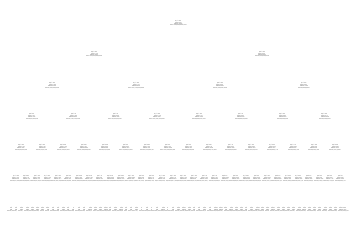

In [94]:
tree.plot_tree(DT)